# Assignment no 48 EDA 2 (25.3.23)

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
%matplotlib inline

Flight Price:

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [2]:
df_flight = pd.read_excel("flight_price.xlsx")
df_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
1,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
2,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
3,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
4,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826


In [3]:
f"The number of columns in flight dataset are {df_flight.shape[1]} and rows are {df_flight.shape[0]}."

'The number of columns in flight dataset are 11 and rows are 10683.'

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

In [4]:
df_flight.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


<AxesSubplot: xlabel='Price', ylabel='Count'>

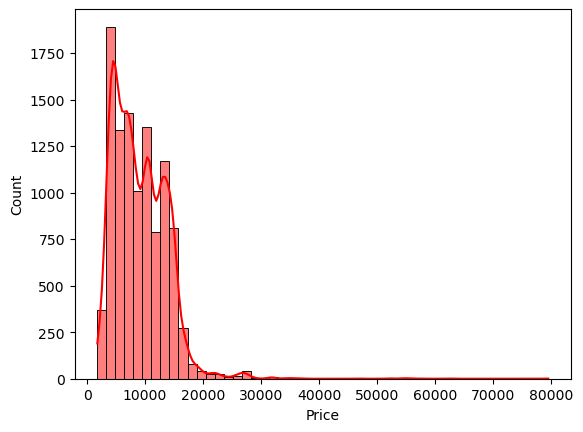

In [5]:
sns.histplot(df_flight['Price'], bins =50, color='red', kde=True )

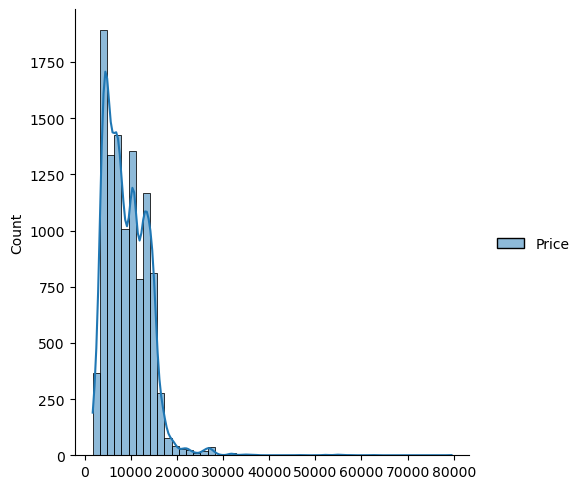

In [6]:
sns.displot(data=df_flight, bins=50, kde=True)

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?


In [7]:
"The range of flight prices lies between ₹ {} and ₹ {} ".format(min(df_flight.Price), max(df_flight.Price))

'The range of flight prices lies between ₹ 1759 and ₹ 79512 '

Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

<AxesSubplot: xlabel='Airline', ylabel='Price'>

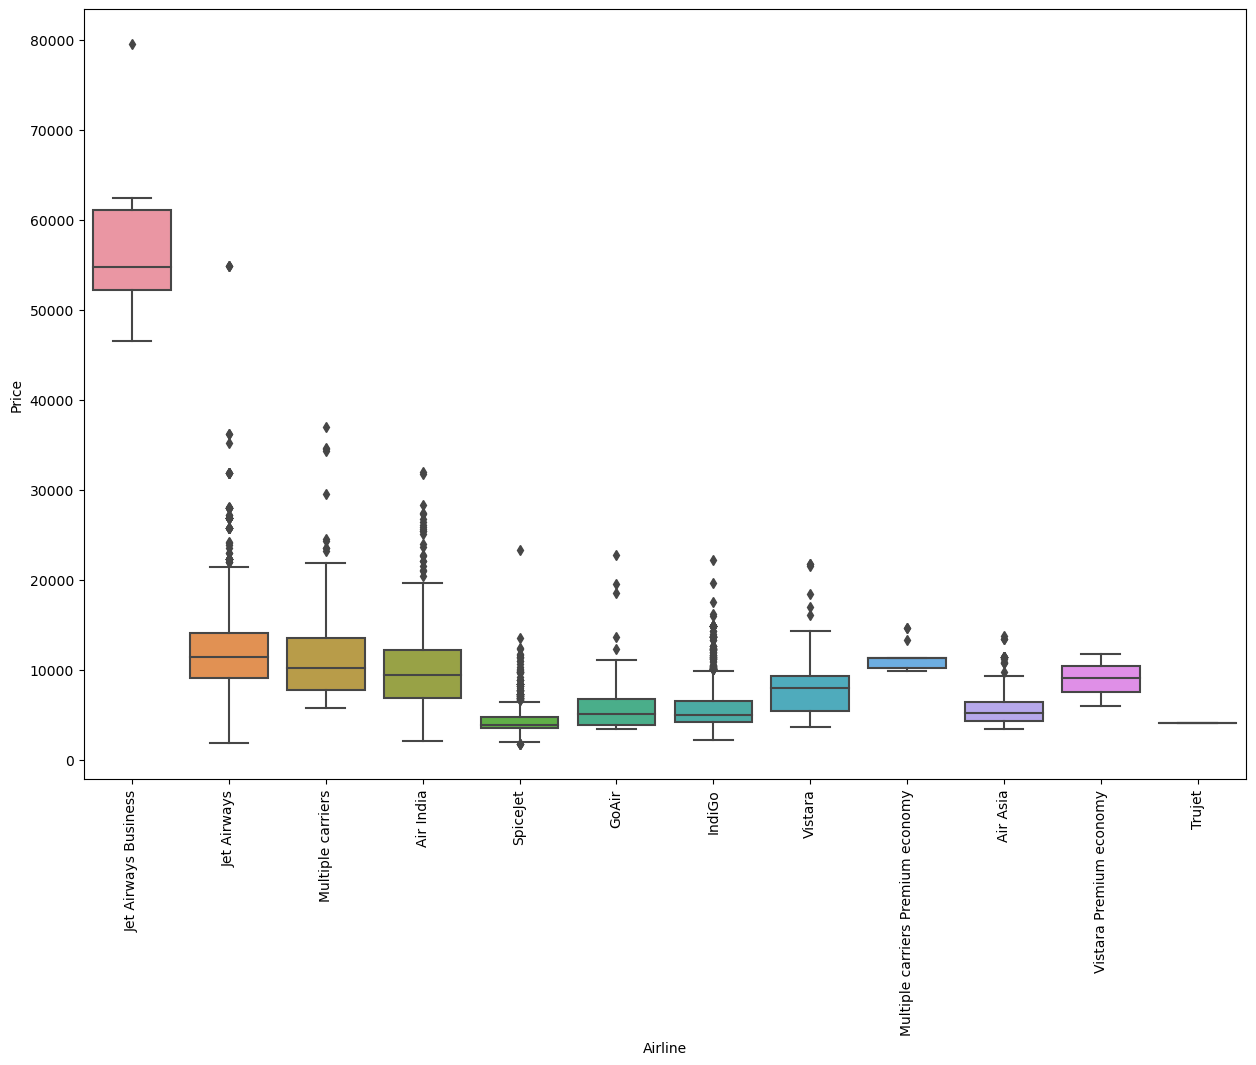

In [8]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 90)
sns.boxplot(y=df_flight['Price'], x=df_flight['Airline'], orient='v',)

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

<AxesSubplot: >

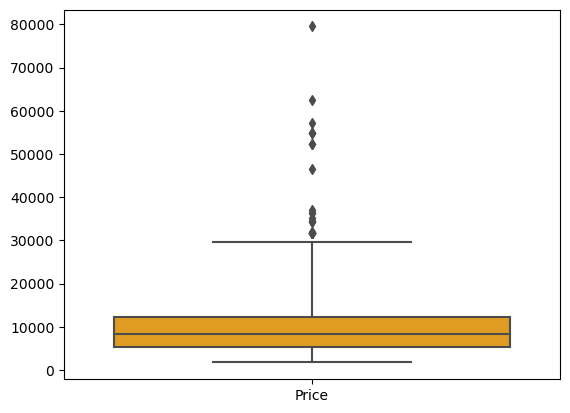

In [9]:
sns.boxplot(df_flight, color='orange', whis=2.5)

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?


In [10]:
df_flight['Month'] = df_flight['Date_of_Journey'].str.split('/').str[1]

In [11]:
df_flight['Month'].unique()

array(['03', '05', '06', '04'], dtype=object)

In [12]:
df_flight['Month']=df_flight['Month'].map({'03':'March','04':'April','05':'May','06':'June'})

In [13]:
df_flight.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,March
1,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,March


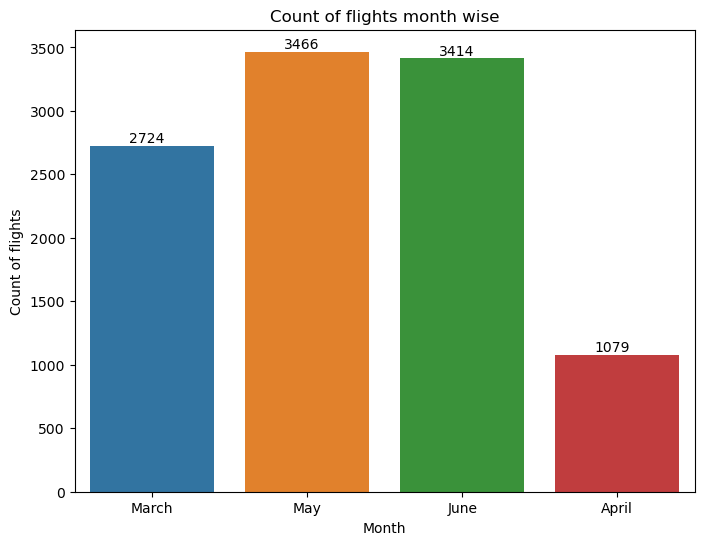

In [14]:
plt.figure(figsize = (8,6))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Month', data = df_flight)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

I will use seaborn countplot to visualize that in which month how much flights have taken off to identify the peak travel season.

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

In [15]:
# At first I will get descriptive statistics of flight price.

df_flight[['Price']].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


From this statistics I can get the minimum , maximum and other quartile values.

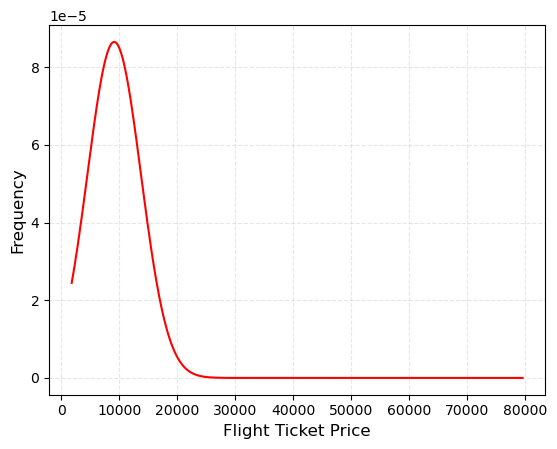

In [16]:
from scipy import stats

# Calculating mean and Stdev of Price
price_mean = np.mean(df_flight["Price"])
price_std = np.std(df_flight["Price"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_flight["Price"].sort_values(), price_mean, price_std)

# Drawing a graph
plt.plot(df_flight["Price"].sort_values(), pdf, c = 'r')  
plt.xlabel("Flight Ticket Price", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

From above plot of probability density function we can say that the maximum number of tickets purchased has value around almost 10,000. 

<AxesSubplot: xlabel='Airline', ylabel='Price'>

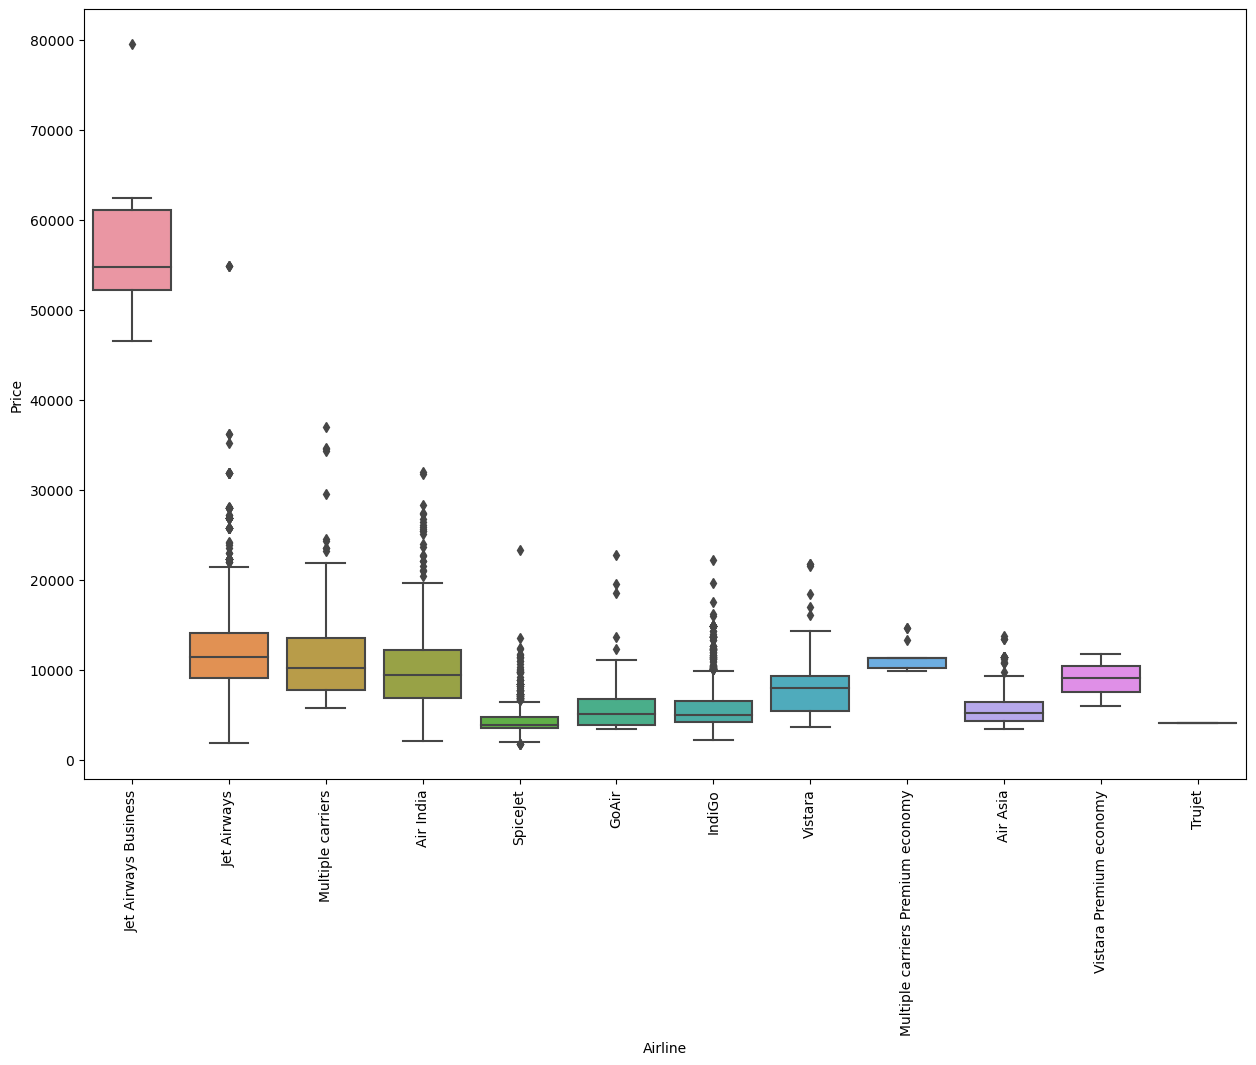

In [17]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 90)
sns.boxplot(y=df_flight['Price'], x=df_flight['Airline'], orient='v',)

From above seaborn boxplot we can say that Jet Airways Business Airline has maximum flight ticket price, almost all airlines have price outliers and Trujet Airlines has minimum flight ticket price.

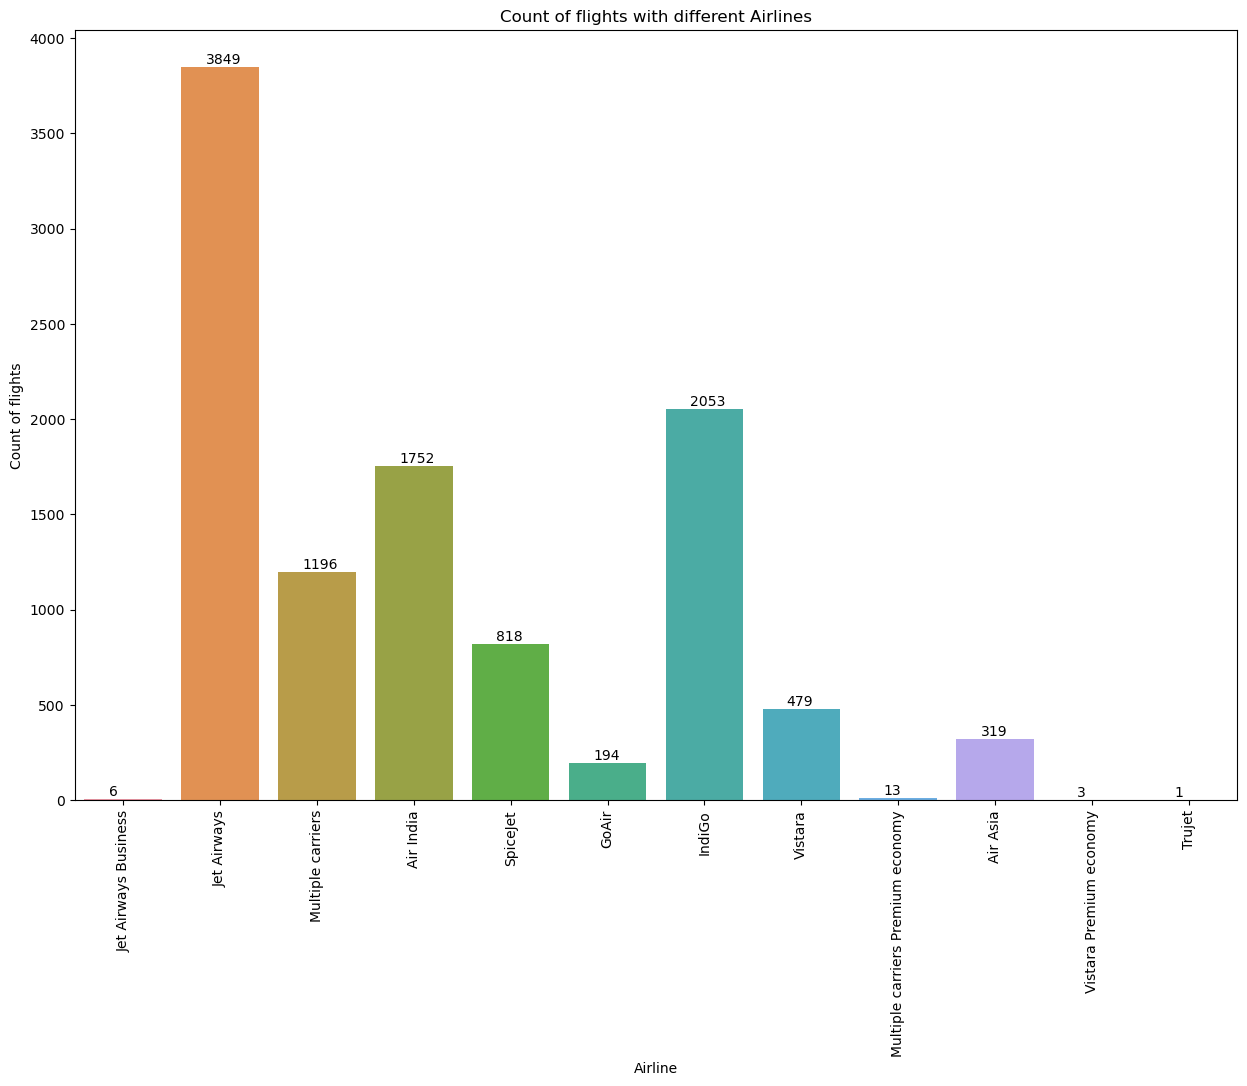

In [18]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df_flight)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

From above plot we can say that Jet Airways has maximum takeoffs while Trujet has only one.

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

Ans-

To identify the factors that affect flight prices from the Flight Price dataset, I would analyze the following features:

Date_of_Journey: Analyze the variation in flight prices based on the day, week, month, or season of travel to identify if there are any trends in the dataset.

Airline: Analyze the variation in flight prices based on the airline to identify if there are any airlines that offer consistently lower or higher prices than others.

Source and Destination: Analyze the variation in flight prices based on the source and destination to identify if there are any routes that are more expensive than others.

Total_Stops: Analyze the variation in flight prices based on the number of stops to identify if there is a correlation between the number of stops and ticket prices.

To present my findings to the management team, I would create a report that includes visualizations to help them easily understand the data. For example, I could create a heatmap that shows the average ticket prices by month and airline, and a scatterplot that shows the relationship between ticket prices and the number of stops.

Google Playstore:

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [19]:
df_google = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")

In [20]:
f"The number of columns in flight dataset are {df_google.shape[1]} and rows are {df_google.shape[0]}."

'The number of columns in flight dataset are 13 and rows are 10841.'

Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

In [21]:
df_google[['Rating','Category']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    9367 non-null   float64
 1   Category  10841 non-null  object 
dtypes: float64(1), object(1)
memory usage: 169.5+ KB


<AxesSubplot: xlabel='Rating', ylabel='Category'>

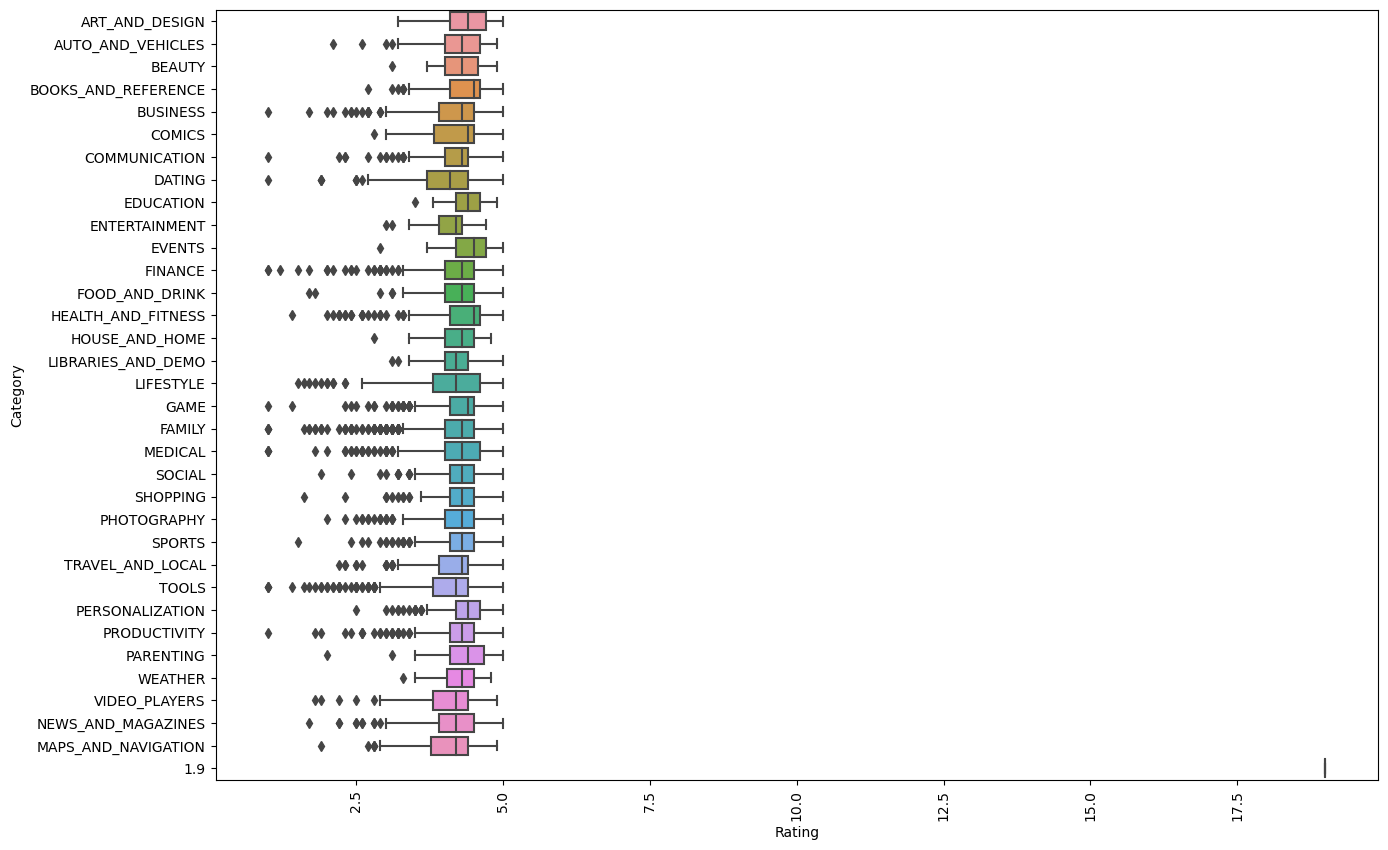

In [22]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 90)
sns.boxplot(x=df_google['Rating'], y=df_google['Category'])

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

In [23]:
df_google.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Impact of missing values on analysis -
1. Missing values present in the dataset can impact the performance of the model by creating a bias in the dataset.
2. This bias can create a lack of relatability and trustworthiness in the dataset. 
3. The loss in values might contain crucial insights or information for model development.

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

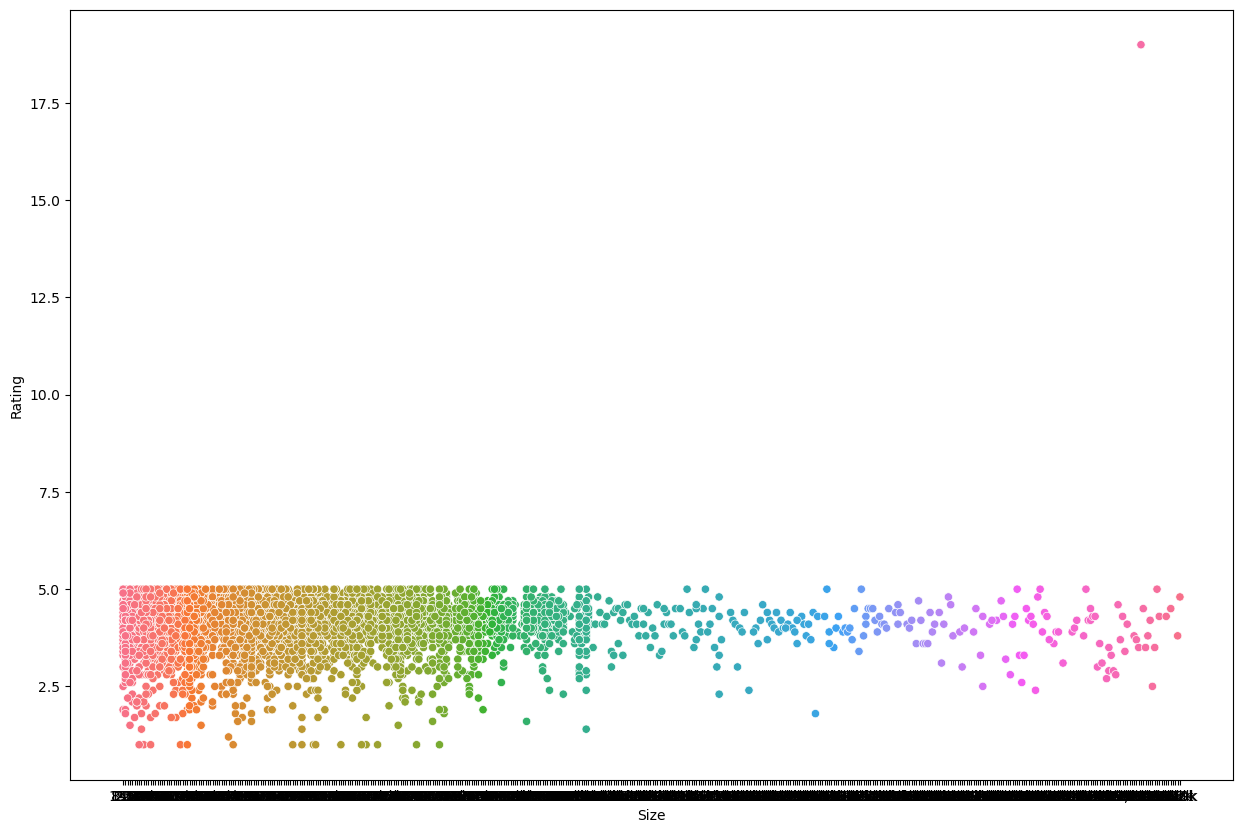

In [24]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Size",y="Rating",data=df_google, hue="Size", legend=False, )
plt.show()

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [25]:
df_google[['Type','Price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    10840 non-null  object
 1   Price   10841 non-null  object
dtypes: object(2)
memory usage: 169.5+ KB


<div class="alert-warning">
Hence Type and Price variables are of object datatype to plot bar chart we have to convert them into numeric datatype first.</div>

In [26]:
df_google['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [27]:
#Removing null values from type variable.
df_google[df_google['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [28]:
df_google.drop(9148, inplace=True)
df_google[df_google['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [29]:
df_google['Type'].replace(to_replace='0',value='Free',inplace=True)

In [30]:
df_google['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [31]:
df_google['Price'].replace(to_replace='Everyone',value='0',inplace=True)

In [32]:
df_google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [33]:
df_google['Price'] = df_google['Price'].str.replace('$','')
df_google['Price'] = df_google['Price'].str.replace('.','')

/tmp/ipykernel_3839/2334901391.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_google['Price'] = df_google['Price'].str.replace('$','')
/tmp/ipykernel_3839/2334901391.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_google['Price'] = df_google['Price'].str.replace('.','')


In [34]:
df_google['Price'].unique()

array(['0', '499', '399', '699', '149', '299', '799', '599', '349', '199',
       '999', '749', '099', '900', '549', '1000', '2499', '1199', '7999',
       '1699', '1499', '100', '2999', '1299', '249', '1099', '150',
       '1999', '1599', '3399', '7499', '3999', '395', '449', '170', '899',
       '200', '388', '2599', '39999', '1799', '40000', '302', '176',
       '484', '477', '161', '250', '159', '649', '129', '500', '1399',
       '29999', '37999', '3799', '1899', '38999', '1990', '849', '175',
       '1400', '485', '4699', '10999', '15499', '308', '259', '480',
       '196', '1940', '390', '459', '1546', '304', '429', '260', '328',
       '460', '2899', '295', '290', '197', '20000', '8999', '256', '3099',
       '361', '39499', '126', '120', '104'], dtype=object)

In [35]:
df_google['Price'] = df_google['Price'].astype('int')

In [36]:
df_google[['Type','Price']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    10840 non-null  object
 1   Price   10840 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 254.1+ KB


<AxesSubplot: xlabel='Type', ylabel='Price'>

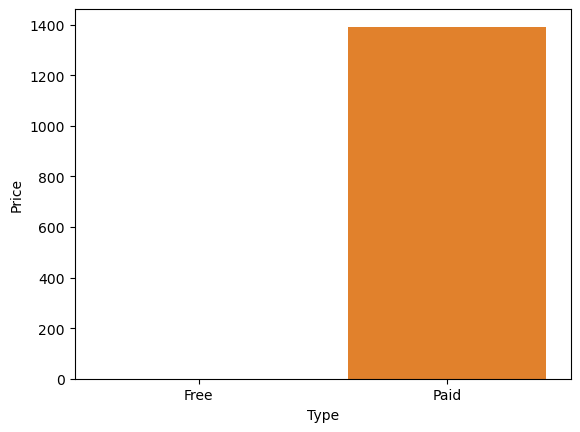

In [37]:
price_by_type = df_google.groupby('Type')['Price'].mean().reset_index()

# Create a bar chart using Seaborn
sns.barplot(x='Type', y='Price', data=price_by_type)

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [38]:
df_google['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', 'Free'], dtype=object)

In [39]:
df_google[['App']].value_counts().head(10)

App                                               
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
Duolingo: Learn Languages Free                        7
ESPN                                                  7
Bleacher Report: sports news, scores, & highlights    6
Bowmasters                                            6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
Nick                                                  6
dtype: int64

In [40]:
df_google[['Installs','App']].sort_values(by='Installs', ascending=False).head(10)

,Installs,App
10472,Free,Life Made WI-Fi Touchscreen Photo Frame
420,"500,000,000+",UC Browser - Fast Download Private & Secure
474,"500,000,000+",LINE: Free Calls & Messages
3767,"500,000,000+",Flipboard: News For Our Time
3574,"500,000,000+",Cloud Print
3326,"500,000,000+",Gboard - the Google Keyboard
431,"500,000,000+",Viber Messenger
4222,"500,000,000+",imo free video calls and chat
3235,"500,000,000+",Google Translate
1842,"500,000,000+",Candy Crush Saga


Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

<AxesSubplot: xlabel='Rating', ylabel='Category'>

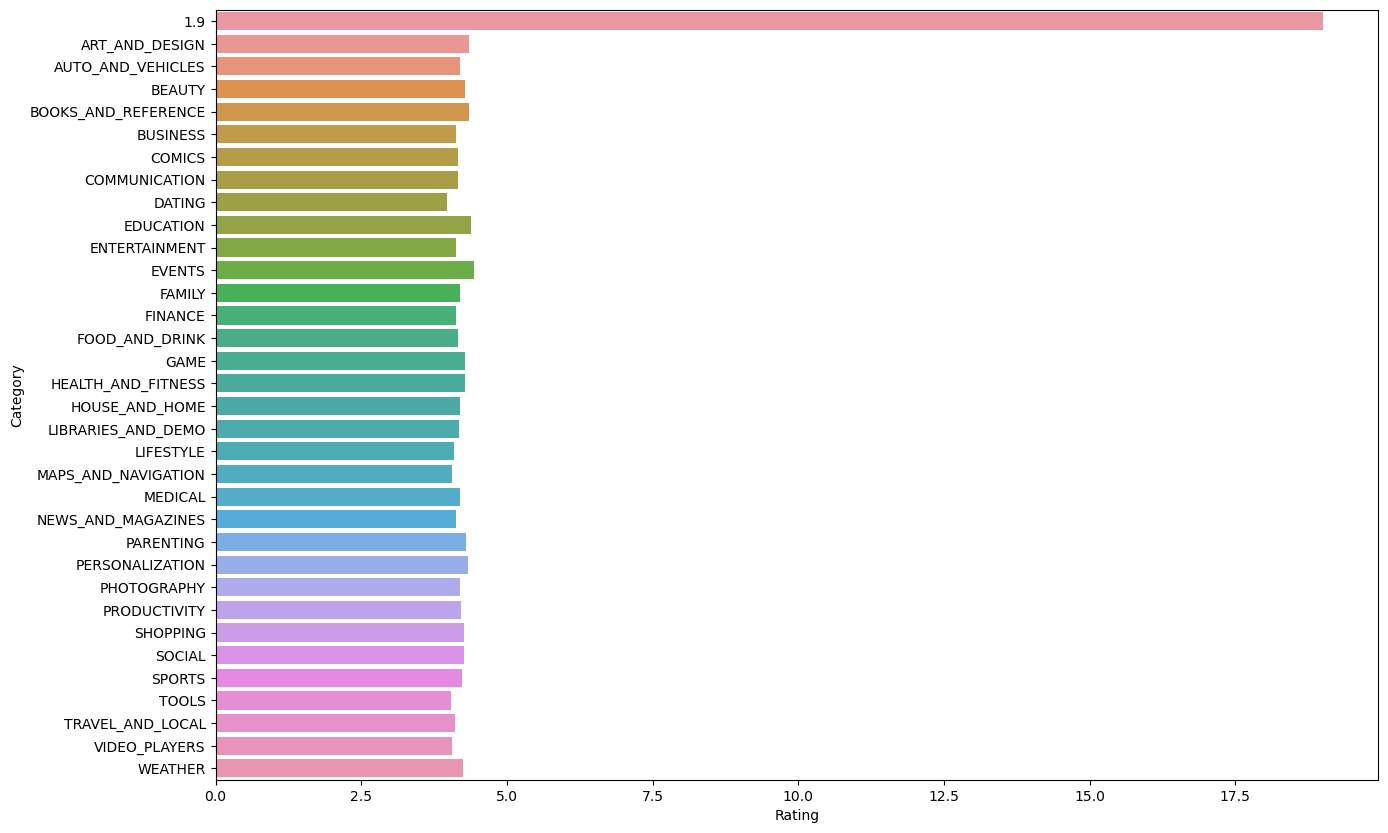

In [50]:
rating_by_category = df_google.groupby('Category')['Rating'].mean().reset_index()

# Create a bar chart using Seaborn
plt.figure(figsize=(15,10))
sns.barplot(y='Category', x='Rating', data=rating_by_category)

To identify the most popular app categories in the Google Playstore dataset, we can approach the task in the following way:

1. Load the dataset into a Pandas DataFrame and clean the data by removing duplicates, missing values, and irrelevant columns.
2. Analyze the Category column to identify the most common app categories in the dataset.
3. Analyze the Installs column to identify the most popular app categories based on the number of installs.
4. Compare the results of steps 2 and 3 to make recommendations to the company.

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

## Answer:
To identify the most successful app developers in the Google Playstore dataset, we can analyze the following features:

1. Developer: We can analyze the number of apps published by each developer to identify the most prolific developers.

2. Rating: We can analyze the average rating of apps published by each developer to identify the developers with the highest-rated apps.

3. Installs: We can analyze the total number of app installs for each developer to identify the most popular developers.

To present our findings, we can use the following data visualizations:

1. Bar chart: We can use a bar chart to visualize the number of apps published by each developer.

2. Scatter plot: We can use a scatter plot to visualize the relationship between the average rating and the number of app installs for each developer.

3. Heatmap: We can use a heatmap to visualize the total number of app installs for each developer by app category.

Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

Answer:

To identify the best time to launch a new app on the Google Playstore, the following features can be analyzed:

Number of Installs: The number of installs of the top apps can be analyzed to identify trends and patterns that indicate the best time to launch a new app.

Reviews and Ratings: The reviews and ratings of the top apps can be analyzed to identify the most favorable time for launching a new app.

Category: The category of the app can also play a significant role in identifying the best time to launch a new app. For instance, gaming apps may have a different trend as compared to education or productivity apps.

Seasonal Trends: Some apps may have seasonal relevance. For example, an app related to tax filing may be launched around the tax season.

Data visualizations that can be used to present the findings include:

Line charts: To show the trend of installs, ratings, and reviews over time.

Heat maps: To show the popularity of app categories across different times of the year.

Bar charts: To show the comparison of different categories or apps based on installs, ratings, or reviews.

Scatter plots: To show the correlation between the number of installs and ratings or reviews over time.